# E-commerce Churn Prediction

In [52]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler


from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier



from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from fancyimpute import IterativeImputer
from skopt import BayesSearchCV
from imblearn.over_sampling import SMOTE


In [2]:
#data description
df_description = pd.read_excel('E_Commerce_Dataset.xlsx', sheet_name='Data Dict', header=1, usecols=[1,2,3])

In [3]:
df_description

,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


In [4]:
df = pd.read_excel('E_Commerce_Dataset.xlsx', sheet_name='E Comm')


In [5]:
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


## Exploratory Data Analysis (EDA) 
This is a crucial step in the data analysis process that involves visually and statistically summarizing, interpreting, and understanding the main characteristics of a dataset. It helps analysts uncover patterns, trends, relationships, anomalies, and potential insights within the data. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [7]:
#provide various statistics for each of the categorical columns in the DataFrame
df.describe(include='O') 

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


Considering the catogorical variables, above statistics displays the count of non-null values, number of unique values, top value of each varaible and the frequencies of the top values.

In [8]:
#shape of the data
df.shape

(5630, 20)

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

Above it shows the null values of each attribute.

In [11]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

##### Types of the categorical variables

In [12]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print(i)
        print()
        print('the types are:') 
        print(df[i].value_counts())
        print()
        print()

PreferredLoginDevice

the types are:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64


PreferredPaymentMode

the types are:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64


Gender

the types are:
Male      3384
Female    2246
Name: Gender, dtype: int64


PreferedOrderCat

the types are:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64


MaritalStatus

the types are:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64




#### Data Preprocessing part 1

Replace the Cash on Delivery to COD and Credit card to CC because those are the same values

In [13]:

df['PreferredPaymentMode'] = df['PreferredPaymentMode'].str.replace('Cash on Delivery','COD')
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].str.replace('Credit Card','CC')

In [14]:
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,CC,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,CC,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,CC,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


## Univariate Analysis

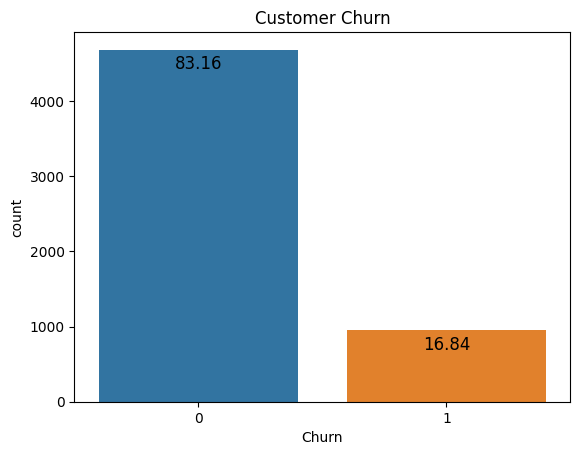

In [15]:
#counting the number of data is in churn class and not churn class
churn_plt = sns.countplot(x='Churn', data = df)
plt.title("Customer Churn")
for c in churn_plt.patches:
    churn_plt.annotate(format((c.get_height()/5630)*100,'.2f'), (c.get_x() + c.get_width()/2., c.get_height()),\
                ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
plt.show()

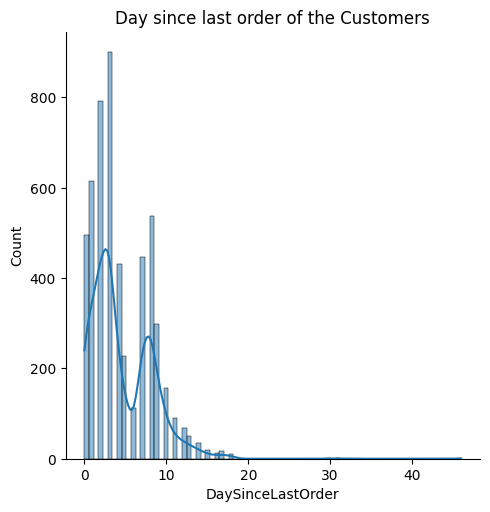

In [16]:

sns.displot(x='DaySinceLastOrder', kde = True, data = df)
plt.title("Day since last order of the Customers")
plt.show()


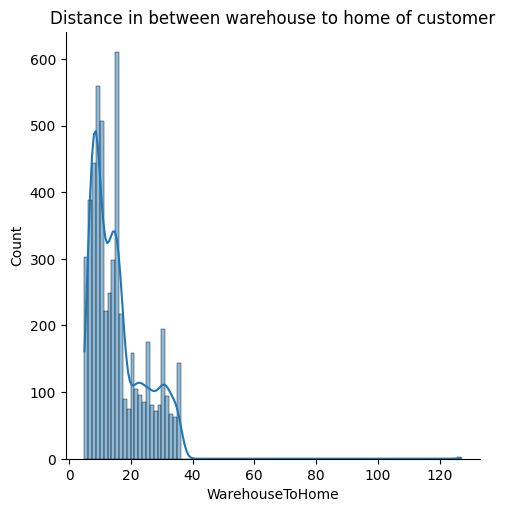

In [17]:
sns.displot(x='WarehouseToHome', kde = True, data = df)
plt.title("Distance in between warehouse to home of customer")
plt.show()


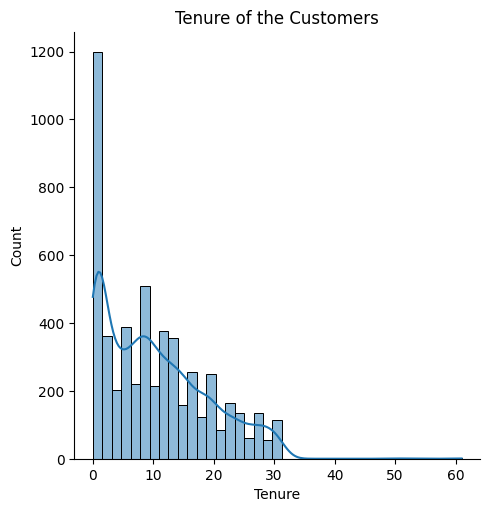

In [18]:
sns.displot(x='Tenure', kde=True, data=df)
plt.title("Tenure of the Customers")
plt.show()

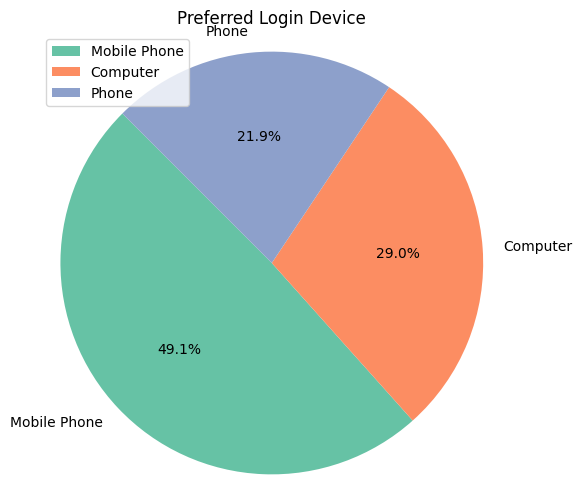

In [19]:
# Count the frequency of each Preferred Login Device
PreferredLoginDevice_counts = df['PreferredLoginDevice'].value_counts()
categories = PreferredLoginDevice_counts.index
values = PreferredLoginDevice_counts.values
colors = sns.color_palette('Set2', len(categories))
plt.figure(figsize=(6, 6))
plt.pie(values, labels=categories, colors=colors, autopct='%1.1f%%', startangle=135)
plt.title('Preferred Login Device')
plt.legend(categories, loc='best')
plt.axis('equal')
plt.show()

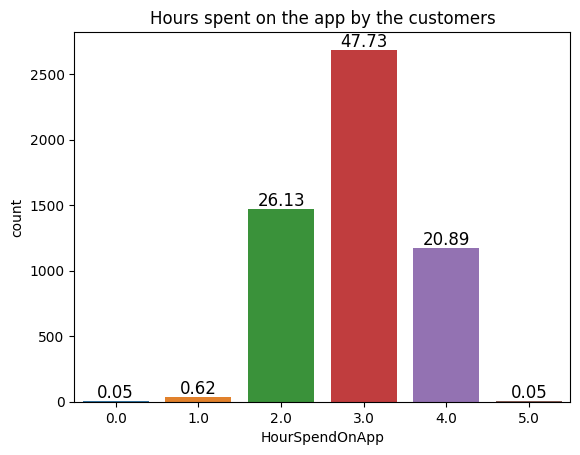

In [20]:
hour_plt = sns.countplot(x='HourSpendOnApp', data=df)
for h in hour_plt.patches:
    hour_plt.annotate(format((h.get_height()/5630)*100,'.2f'), (h.get_x() + h.get_width()/2., h.get_height()),\
                ha='center',va='center',size=12,xytext=(0, 6),textcoords='offset points')
plt.title("Hours spent on the app by the customers")
plt.show()

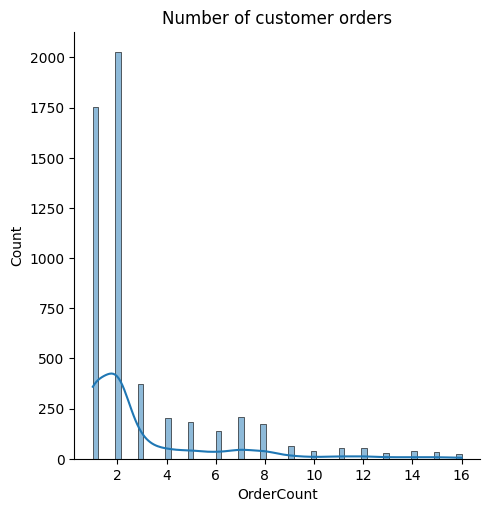

In [21]:
sns.displot(x='OrderCount', kde=True, data=df)
plt.title("Number of customer orders")
plt.show()

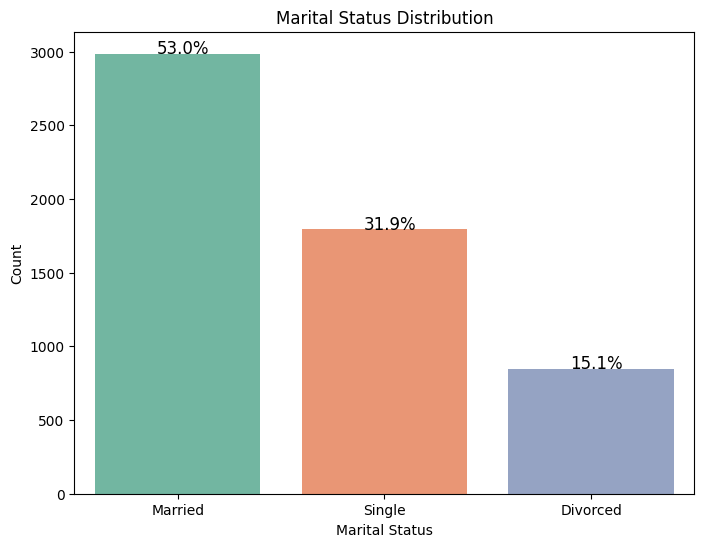

In [22]:
maritalStatus_counts = df['MaritalStatus'].value_counts()
plt.figure(figsize=(8, 6))
maritalStatus_plt = sns.barplot(x=maritalStatus_counts.index, y=maritalStatus_counts.values, palette='Set2')
total = len(df['MaritalStatus'])
for p in maritalStatus_plt.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height()
    maritalStatus_plt.annotate(percentage, (x, y), fontsize=12)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status Distribution')

plt.show()

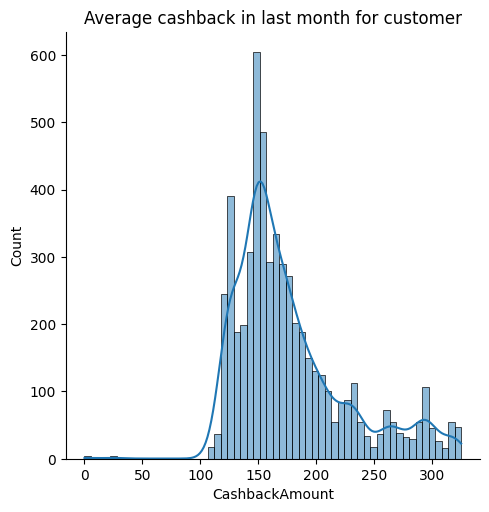

In [23]:
sns.displot(x='CashbackAmount',kde=True, data=df)
plt.title('Average cashback in last month for customer')
plt.show()

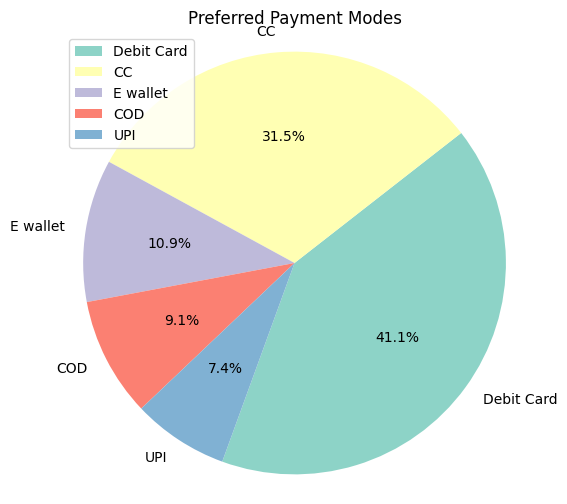

In [24]:
# Count the frequency of each payment mode
payment_mode_counts = df['PreferredPaymentMode'].value_counts()
categories = payment_mode_counts.index
values = payment_mode_counts.values
colors = sns.color_palette('Set3', len(categories))
plt.figure(figsize=(6, 6))
plt.pie(values, labels=categories, colors=colors, autopct='%1.1f%%', startangle=250)
plt.title('Preferred Payment Modes')
plt.legend(categories, loc='best')
plt.axis('equal')
plt.show()

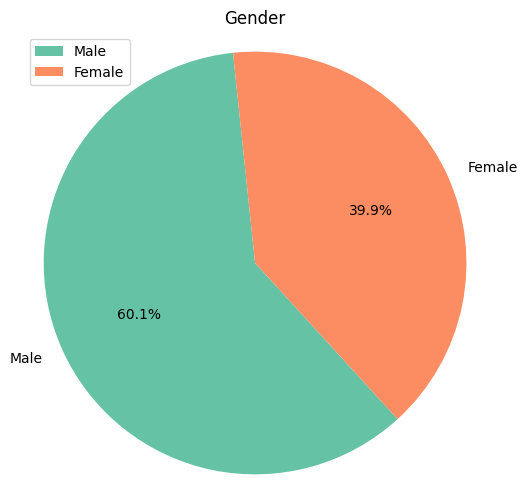

In [25]:
# Count the frequency of gender
gender_counts = df['Gender'].value_counts()
categories = gender_counts.index
values = gender_counts.values
colors = sns.color_palette('Set2', len(categories))
plt.figure(figsize=(6, 6))
plt.pie(values, labels=categories, colors=colors, autopct='%1.1f%%', startangle=456)
plt.title('Gender')
plt.legend(categories, loc='best')
plt.axis('equal')
plt.show()

## Multivariate Analysis

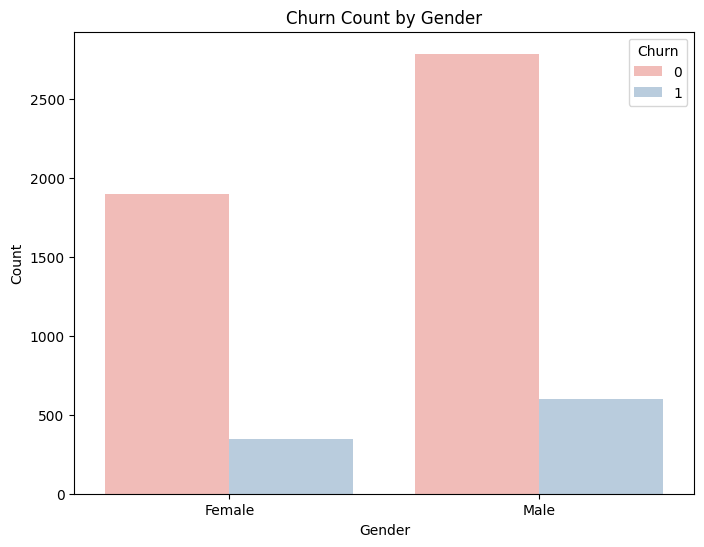

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='Churn', palette='Pastel1')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn Count by Gender')

plt.show()

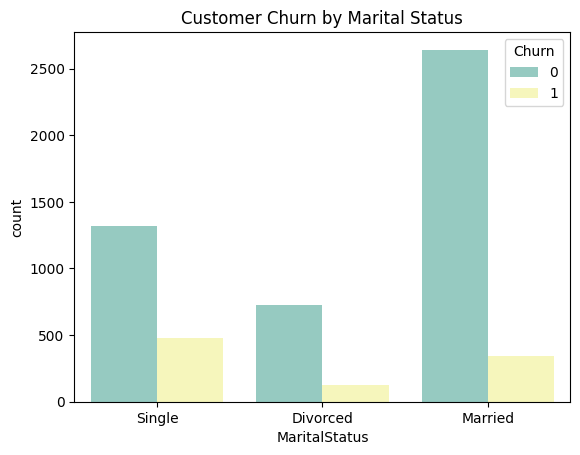

In [27]:
sns.countplot(x='MaritalStatus', hue='Churn', palette='Set3', data=df)
plt.title("Customer Churn by Marital Status")
plt.show()

## Handling Missing Values

In [28]:
binary_cat_cols = ['Complain']
outcome = ['Churn']
cat_cols = ['PreferredLoginDevice','Gender','PreferedOrderCat','MaritalStatus','CityTier']
num_cols = ['Tenure','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','OrderAmountHikeFromlastYear',
           'CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']

<function matplotlib.pyplot.show(close=None, block=None)>

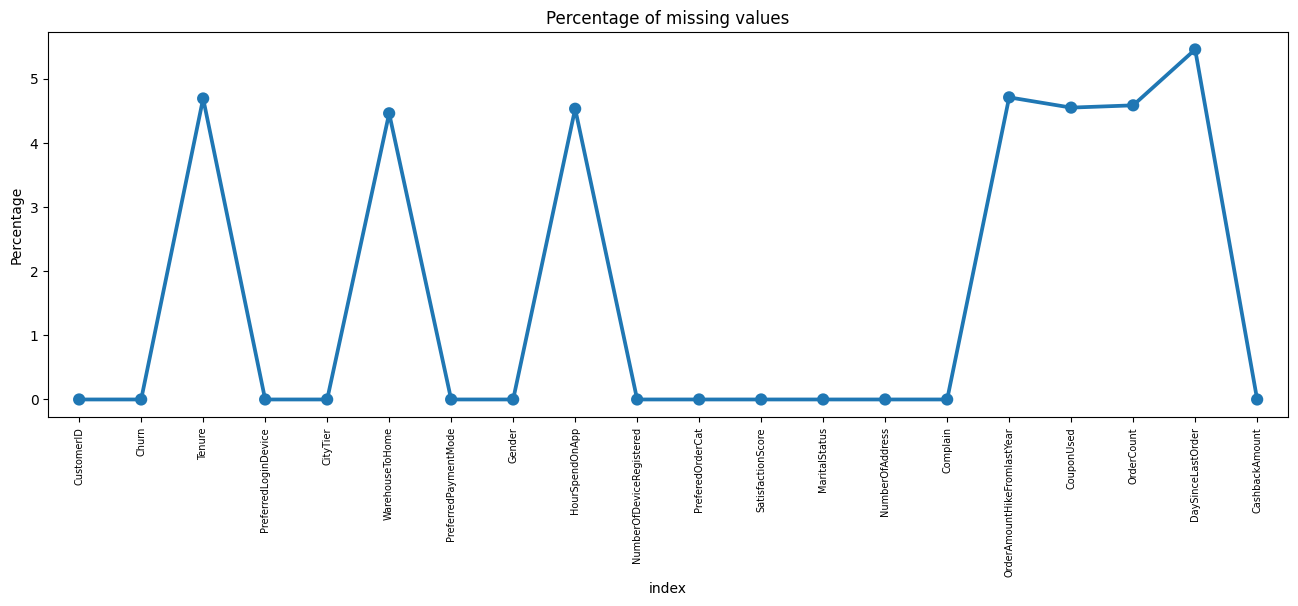

In [29]:
#Check missing values
missing_values = ((df.isnull().sum())*100/df.shape[0])
missing_values = missing_values.reset_index(name='percentage')
plt.figure(figsize=(16,5))
ax = sns.pointplot(data=missing_values, x="index", y="percentage", dodge=True)
plt.xticks(rotation = 90, fontsize = 7)
plt.title("Percentage of missing values")
plt.ylabel("Percentage")
plt.show


In [30]:
#Check nulls
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [31]:
#Check nulls after imputation
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [32]:
#Impute missing values with median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

When comparing the churned and non-churned customers there is a imbalance which is normal which creates the data imbalance in the above dataset.

In [33]:
#Removing outliers
def remove_outlier(df, col):    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75) 
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)

    df[col]=np.where(df[col]>ur,ur,df[col])
    df[col]=np.where(df[col]<lr,lr,df[col])
    
    return df

for c in num_cols:
    df = remove_outlier(df, c)

## Model Development

### Categorical Encoding (Converting the categorical values to numerical values)

cat_data = df.select_dtypes(include = 'object')
cat_data

In [49]:
encoded = pd.get_dummies(cat_data, drop_first = True)
data_enc = pd.concat([df.drop(cat_data.columns,axis = 1),encoded], axis=1)
data_enc.drop('CustomerID', axis = 1, inplace = True)


### Apply SMOTE

In [75]:
x = data_enc.drop(['Churn'],axis=1)
y = data_enc['Churn']

smote = SMOTE(sampling_strategy='minority', random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

# Split the resampled data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=0)
#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, stratify = y, random_state =0)

#Cross Validation
skfcv = StratifiedKFold(n_splits = 5)


In [76]:
#building the random forest pipeline
rf_pipe = Pipeline([('imputer',IterativeImputer(random_state=0)),('scaler',StandardScaler()),
                   ('rfmodel',RandomForestClassifier())])
#cross validation
print(f"Cross Validation score for Random Forest: {np.mean(cross_val_score(rf_pipe, x_train, y_train,cv=skfcv, scoring='f1'))}")


Cross Validation score for Random Forest: 0.9741446649067699


Test score for Random Forest: 0.8944444444444444
Training score for Random Forest: 1.0


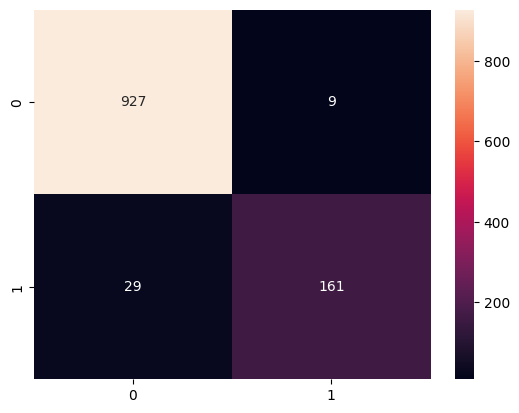

In [39]:
#using Random Forest pipeline to predict test sample
rf_pipe.fit(x_train,y_train)
print(f"Test score for Random Forest: {f1_score(y_test, rf_pipe.predict(x_test))}")
print(f"Training score for Random Forest: {f1_score(y_train, rf_pipe.predict(x_train))}")
rf_mat = confusion_matrix(y_test, rf_pipe.predict(x_test))
sns.heatmap(rf_mat, annot=True,fmt="g")
plt.show()


In [80]:
#XG Boost pipeline
xgb_pipe = Pipeline([('imputer',IterativeImputer(random_state=0)),('scaler',StandardScaler()),
                    ('xgb',XGBClassifier(verbosity=0))])

#cross validate XGBoost model
print(f"Cross validation score for XGBoost: {np.mean(cross_val_score(xgb_pipe, x_train, y_train, cv=skfcv, scoring='f1'))}")


Cross validation score for XGBoost: 0.9817370108522665


Test score for XGBoost: 0.9778947368421054
Training score for XGBoost: 1.0


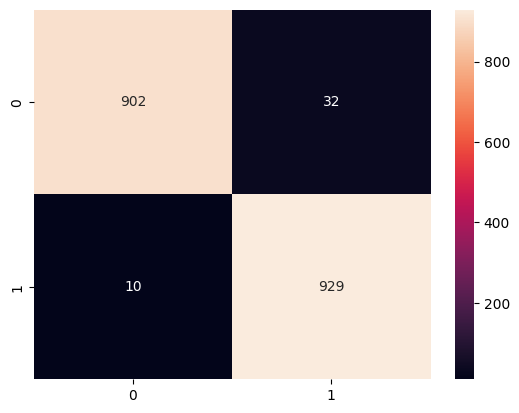

In [79]:
#using XG_Boost pipeline to predict sample
xgb_pipe.fit(x_train,y_train)
print(f"Test score for XGBoost: {f1_score(y_test, xgb_pipe.predict(x_test))}")
print(f"Training score for XGBoost: {f1_score(y_train, xgb_pipe.predict(x_train))}")
xgb_mat = confusion_matrix(y_test, xgb_pipe.predict(x_test))
sns.heatmap(xgb_mat, annot=True,fmt="g")
plt.show()


In [81]:
# Create a pipeline with LightGBM classifier
lgbm_pipe = Pipeline([('imputer',IterativeImputer(random_state=0)),('scaler',StandardScaler()),
                    ('lgbm',LGBMClassifier(verbosity=0,force_row_wise=True))])

#cross validate LightGBM model
print(f"Cross validation score for LightGBM: {np.mean(cross_val_score(lgbm_pipe, x_train, y_train, cv=skfcv, scoring='f1'))}")



Cross validation score for LightGBM: 0.9746142201182458


Test score for LightGBM: 0.9719725013220519
Training score for LightGBM: 0.9963908568373212


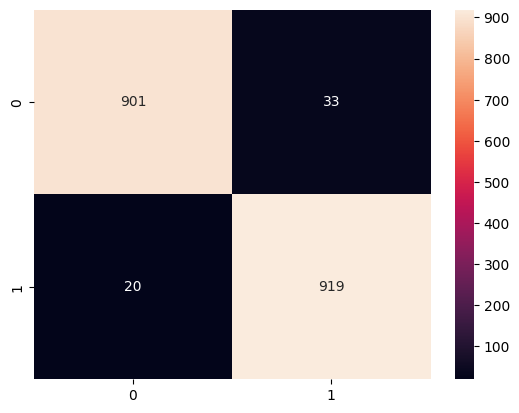

In [82]:
#using LightGBM pipeline to predict sample
lgbm_pipe.fit(x_train,y_train)
print(f"Test score for LightGBM: {f1_score(y_test, lgbm_pipe.predict(x_test))}")
print(f"Training score for LightGBM: {f1_score(y_train, lgbm_pipe.predict(x_train))}")
lgbm_mat = confusion_matrix(y_test, lgbm_pipe.predict(x_test))
sns.heatmap(lgbm_mat, annot=True,fmt="g")
plt.show()


In [84]:
#CatBoost pipeline
cat_pipe = Pipeline([('imputer',IterativeImputer(random_state=0)),('scaler',StandardScaler()),
                    ('catboost',CatBoostClassifier(verbose=0))])

#cross validate CatBoost model
print(f"Cross validation score for CatBoost: {np.mean(cross_val_score(cat_pipe, x_train, y_train, cv=skfcv, scoring='f1'))}")

Cross validation score for CatBoost: 0.9723885121769922


Test score for CatBoost: 0.9704952581664911
Training score for CatBoost: 0.9961204013377927


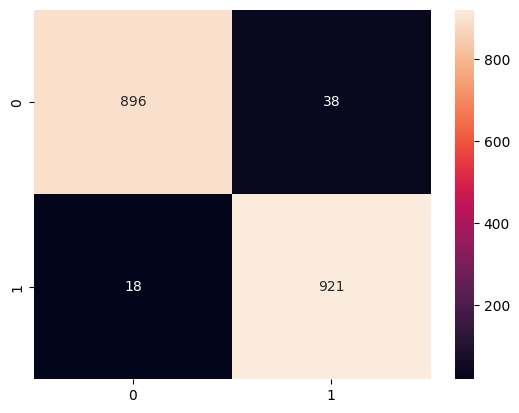

In [83]:
#using CatBoost pipeline to predict sample
cat_pipe.fit(x_train,y_train)
print(f"Test score for CatBoost: {f1_score(y_test, cat_pipe.predict(x_test))}")
print(f"Training score for CatBoost: {f1_score(y_train, cat_pipe.predict(x_train))}")
cat_mat = confusion_matrix(y_test, cat_pipe.predict(x_test))
sns.heatmap(cat_mat, annot=True,fmt="g")
plt.show()

### Tuning the hyperparameters to reduce overfitting and improve test performance

In [85]:
import optuna
from functools import partial

In [91]:
def objective(trial,data=x_resampled,target=y_resampled):
    
    train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.2,random_state=0)
    param = {
        'tree_method':'gpu_hist',  # this parameter means using the GPU when training our model to speedup the training process
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators': 10000,
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17]),
        'random_state': trial.suggest_categorical('random_state', [2020]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = xgb.XGBRegressor(**param)  
    
    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=100,verbose=False)
    
    preds = model.predict(test_x)
    
    rmse = mean_squared_error(test_y, preds,squared=False)
    
    return rmse

In [92]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2023-09-03 18:04:53,618] A new study created in memory with name: no-name-de0f0d26-78a7-42b2-b39f-4479d00de613
C:\Users\DELL\AppData\Local\Temp\ipykernel_21880\2108634629.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
C:\Users\DELL\AppData\Local\Temp\ipykernel_21880\2108634629.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
[W 2023-09-03 18:04:53,627] Trial 0 failed with parameters: {'lambda': 0.003938873739316456, 'alpha': 2.9467996107703844, 'colsample_bytree': 0.4, 'subsample': 0.5, 'learning_rate': 0.016, 'max_depth': 9, 'random_state': 2020,

AttributeError: type object 'XGBClassifier' has no attribute 'XGBRegressor'